In [6]:
import numpy as np
import pyopencl as cl
import pyopencl.array as cl_array
from pyopencl import clrandom

# Initialize PyOpenCL
platform = cl.get_platforms()[0]
device = platform.get_devices()[0]
context = cl.Context([device])
queue = cl.CommandQueue(context)

# Define kernel function to generate random numbers using Philox
kernel_code = """//CL//
#include <pyopencl-random123/philox.cl>
#include <pyopencl-random123/threefry.cl>

__kernel void generate_random_numbers(__global ulong *output, uint seed) {
    const uint index = get_global_id(0);
    philox4x32_ctr_t c={{}};
    philox4x32_ukey_t uk={{}};

    uk.v[0] = index;
    philox4x32_key_t k = philox4x32keyinit(uk);
    philox4x32_ctr_t r = philox4x32(c, k);
    output[index] = r.v[0];
}
"""

# Compile kernel function
program = cl.Program(context, kernel_code).build()

# Set up output buffer
output_buffer = cl_array.zeros(queue, 1000_000, dtype=np.uint64)

# Execute kernel
program.generate_random_numbers(queue, output_buffer.shape, None, output_buffer.data, np.uint32(123))

# Read output buffer
output = output_buffer.get()

# Print generated random numbers
print("Generated random numbers:")
print(output)

Generated random numbers:
[1713891541 3823634032 1827282629 ... 3603028920 2360589947  645801896]


(array([ 9946., 10263.,  9996., 10044., 10175.,  9950., 10087., 10015.,
         9994., 10156., 10135.,  9761.,  9855.,  9960.,  9973.,  9863.,
        10044., 10071.,  9901.,  9940.,  9921., 10181., 10114.,  9805.,
         9953.,  9839.,  9954., 10017., 10095.,  9966., 10008.,  9913.,
        10081., 10015.,  9844., 10236., 10072., 10026., 10023., 10041.,
         9904., 10112.,  9862., 10221.,  9888., 10083., 10024.,  9981.,
        10046.,  9954., 10037., 10078., 10056., 10037., 10010.,  9913.,
        10028.,  9900.,  9890.,  9974., 10060., 10112.,  9982.,  9762.,
        10147.,  9910.,  9892.,  9944.,  9938.,  9998.,  9783.,  9935.,
        10043., 10033., 10026., 10062.,  9907., 10070.,  9855.,  9992.,
         9725.,  9968.,  9879., 10089., 10066., 10135., 10099., 10033.,
         9819., 10058., 10042., 10030., 10222., 10057., 10071., 10213.,
         9944.,  9985.,  9982.,  9901.]),
 array([0.00000000e+00, 4.29496730e+07, 8.58993459e+07, 1.28849019e+08,
        1.71798692e+08

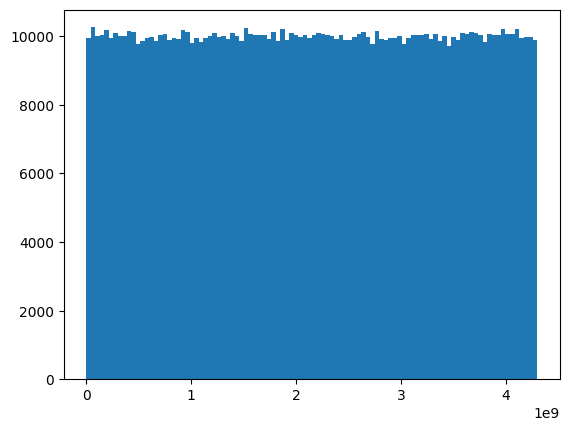

In [7]:
import matplotlib.pyplot as plt
plt.hist(output_buffer.get(), bins=100, range=(0, 2**32))